## Computational Challenge 4

Group \#2

Students: Thuyen Dang, Chunmei Sun, Jayson Cortez, and Alan Akil

Course: Math 6397 - Stochastic Processes in Biology

Professors: Dr. Josić & Dr. Stewart

$\textbf{Challenge:}$


In this challenge two groups will report on the deterministic version of models of these circuits, while the other two will report on the stochastic versions. The last part of each question asks that you compare the results of the simulations. Therefore groups 1 and 2, and groups 3 and 4 will need to work together on each project.

A feed-forward loop (FFL) is a 3-gene genetic circuit in which two “input” transcription factors (TFs), $X$ and $Y$, regulate a third “target” $Z$, with TF $X$ also regulating TF $Y$. Depending on the pattern of activation and repression among the three genes, an FFL can speed or slow the response time of $Z$ to a stimulus in the form of $X$ switching ON or OFF. Here we will explore the behavor of the so-called “incoherent” FFL.
We will assume that X is either OFF or ON such that the concentration of the product of gene $X$ is $X_∗$ where $X_∗ =1$ when the geneis ON and $X∗ =0$when the gene is OFF. We will look at two specific cases of an incoherent FFL.





Work with Group 3 to understand the behavior of the different circuits in response to changes in the input X.

(a) Construct a Petri Net describing a stochastic version of the two FFLs. Assuming the ODEs describe concentrations, suggest reasonable values for reaction rates that will produce at most a few hundred molecules in the products of all three genes, while retaining the regulatory relationships of the deterministic system.

(b) Implement a stochastic simulation corresponding to the two FFLs above using the Gillespie Algorithm.

(c) Estimate the ON-to-OFF and OFF-to-ON response times with strong $Y−Z$ regulation for the two FFL cases.

(d) Assuming X is ON, plot the stationary distribution for the expression of $Z$ with strong $Y-Z$ regulation for the two FFL cases.

In [10]:
# Import packages needed.
import numpy as np
import random
from scipy.special import gamma, factorial
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import tqdm
from numba import jit
import time
from scipy.integrate import solve_ivp

In [16]:
def ssa(x,By,beta_y,alpha_y,Bz,beta_z,alpha_z,k_xy,k_xz,k_yz,T,time_on_init,time_on_end):
    # x=[Y,Z] is the molecule count of each species.
    t_x=[0] # reaction time of fully-observed trajectory
    i=0
    # Reaction matrix.
    v=np.array([[1,0],[-1,0],[0,1],[0,-1]])
    while t_x[i]<T:
        if time_on_init<t_x[i]<time_on_end:
            X=1
        else:
            X=0
        
        # Propensity functions
        a = np.array([By+beta_y * (((X/k_xy)**h)/(1+((X/k_xy)**h))), alpha_y * x[i,0],
                     Bz+beta_z * (((X/k_xz)**h)/(1+((X/k_xz)**h)))*(1/(1+((x[i,0]/k_yz)**h)))
                      ,alpha_z * x[i,1]])
        sum_a=np.sum(a)
        cumsum_a=np.cumsum(a,axis=0)
        # Draw 2 random numbers from U(0,1)
        epsilon=np.random.uniform(0,1,2)
        # Find the reaction that will take place next.
        j=np.min(np.where(epsilon[0]*sum_a<cumsum_a))
        # Compute the time until reaction j happens.
        tau=(np.log(1/epsilon[1]))/sum_a
        # Update molecule counts due to reaction j happening.
        x=np.append(x,[x[i,:]+v[j,:]],axis=0)
        # Update time of simulation.
        t_x=np.append(t_x,[t_x[i]+tau])
        i+=1
    return x,t_x

In [20]:
By = 1; beta_y = 3; alpha_y = 0.01;
Bz = 1; beta_z = 3; alpha_z = 0.01;
k_xy = 1; k_xz = 1; k_yz = 0.01;
h = 0.1
y_0 = 10
z_0 = 10
x = np.array([y_0,z_0]).reshape(1,2)
T = 10000
time_on_init = T//3
time_on_end = 2*T//3

for i in range(1):
    x,t_x = ssa(x,By,beta_y,alpha_y,Bz,beta_z,alpha_z,k_xy,k_xz,k_yz,T,time_on_init,time_on_end)
#     plt.plot(x,v[:,[0]]);
# plt.ylabel("Y")
# plt.xlabel("time");

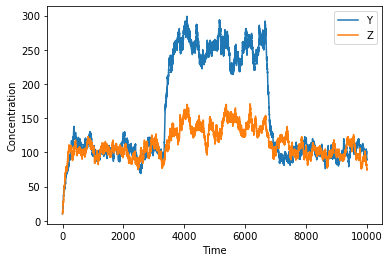

In [25]:
plt.plot(t_x,x[:,0],label='Y')
plt.plot(t_x,x[:,1],label='Z')

plt.xlabel('Time')
plt.ylabel('Concentration')

plt.legend()
plt.show()